In [1]:
# Trying to follow PEP guidance
# PEP 8 - https://peps.python.org/pep-0008/#function-and-variable-names

In [29]:
# Load libraries
import os
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
os.listdir('../data/')

['auto-mpg.data', 'auto-mpg.names']

In [4]:
# Load data in df
data = "auto-mpg.data"
col_names = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year",
    "origin",
    "car_name",
            ]
auto_mpg = pd.read_csv("../data/" + data,
                      sep = "\s+",  # one or more whitespace chars
                      names = col_names,
                      verbose=True)
auto_mpg.shape

Tokenization took: 2.01 ms
Type conversion took: 3.01 ms
Parser memory cleanup took: 0.00 ms


(398, 9)

In [28]:
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
# Check for null values
auto_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [27]:
# Check data types 
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

#### column #01: mpg

In [51]:
# Basic stats
auto_mpg.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [57]:
# looking at the car with the highest mpg as it's almost 3x std away from mean
auto_mpg[auto_mpg.mpg == 46.6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg_check_point
322,46.6,4,86.0,65.00,2110.0,17.9,80,3,mazda glc,1


$z = (X — μ) / σ$

In [60]:
# calculate z-scores for all observations
auto_mpg["z_score"] = (auto_mpg.mpg - auto_mpg.mpg.mean())/auto_mpg.mpg.std()
auto_mpg["z_score"].describe().apply(lambda x: format(x, 'f')) # force

count    398.000000
mean       0.000000
std        1.000000
min       -1.857037
25%       -0.769522
50%       -0.065836
75%        0.701822
max        2.953617
Name: z_score, dtype: object

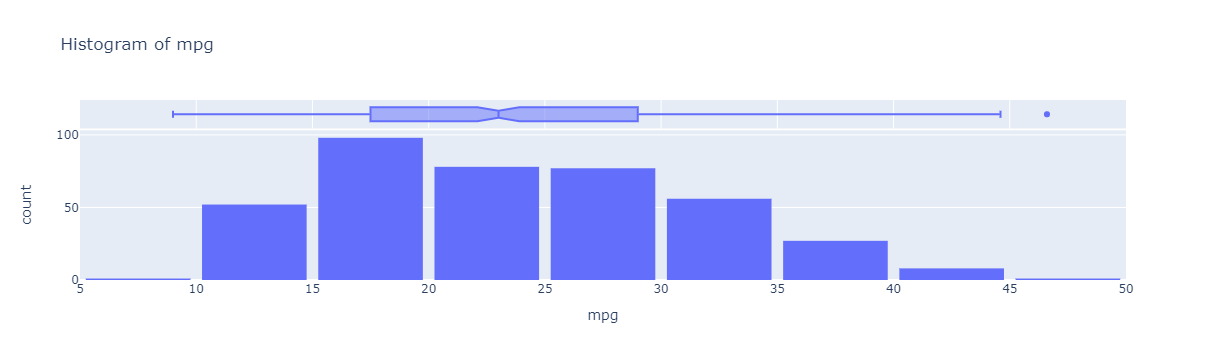

In [26]:
# Distribution of target variable: mpg
fig = px.histogram(auto_mpg,
                   x="mpg",
                   nbins=15,
                   marginal="box",
                   text_auto=True,
                   title='Histogram of mpg',
                  )
fig.update_layout(bargap=0.1,
                  autosize=False,
                  width=500, height=300
                 )
fig.show()

In [40]:
# Are all MPGs actually ints or do we have floats? -> about half have decimals
auto_mpg['mpg_check_point'] = np.modf(auto_mpg['mpg'])[0].ne(0).astype(int)
auto_mpg['mpg_check_point'].value_counts()

0    259
1    139
Name: mpg_check_point, dtype: int64

In [ ]:
# Review possible outliers based on box plot

In [38]:
# TODO: 
auto_mpg.horsepower.value_counts(dropna=False, sort=False)

?        6
46.00    2
116.0    1
76.00    4
94.00    1
        ..
142.0    1
93.00    1
66.00    1
98.00    2
180.0    5
Name: horsepower, Length: 94, dtype: int64